### Librerías

In [ ]:
# Librerías generales

import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import cv2

In [ ]:
# Librerías para entrenamiento

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Activation
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, TensorBoard

### Lectura de datos utilizados para el entrenamiento del modelo

In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Q2 - Redes/competencia/dl-itba-cifar-100-2024-q-1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Q2 - Redes/competencia/dl-itba-cifar-100-2024-q-1/coarse_label_names.pck
/content/drive/MyDrive/Q2 - Redes/competencia/dl-itba-cifar-100-2024-q-1/x_test.npy
/content/drive/MyDrive/Q2 - Redes/competencia/dl-itba-cifar-100-2024-q-1/fine_label_names.pck
/content/drive/MyDrive/Q2 - Redes/competencia/dl-itba-cifar-100-2024-q-1/x_train.npy
/content/drive/MyDrive/Q2 - Redes/competencia/dl-itba-cifar-100-2024-q-1/y_train_coarse.npy
/content/drive/MyDrive/Q2 - Redes/competencia/dl-itba-cifar-100-2024-q-1/y_train_fine.npy


In [ ]:
x_train = np.load("/content/drive/MyDrive/Q2 - Redes/competencia/dl-itba-cifar-100-2024-q-1/x_train.npy")

y_train_fine = np.load("/content/drive/MyDrive/Q2 - Redes/competencia/dl-itba-cifar-100-2024-q-1/y_train_fine.npy")

y_train_coarse = np.load("/content/drive/MyDrive/Q2 - Redes/competencia/dl-itba-cifar-100-2024-q-1/y_train_coarse.npy")

with open("/content/drive/MyDrive/Q2 - Redes/competencia/dl-itba-cifar-100-2024-q-1/fine_label_names.pck", "rb") as f:
    labels_fine = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/Q2 - Redes/competencia/dl-itba-cifar-100-2024-q-1/coarse_label_names.pck", "rb") as f:
    labels_coarse = pickle.load(f)
f.close()

In [ ]:
print(f'Dimensiones de x_train: {x_train.shape}')
print(f'Dimensiones de y_train_fine: {y_train_fine.shape}')
print(f'Dimensiones de y_train_coarse: {y_train_coarse.shape}')
print(f'Dimensiones de labels_fine: {len(labels_fine)}')
print(f'Dimensiones de labels_coarse: {len(labels_coarse)}')

Dimensiones de x_train: (50000, 32, 32, 3)
Dimensiones de y_train_fine: (50000,)
Dimensiones de y_train_coarse: (50000,)
Dimensiones de labels_fine: 100
Dimensiones de labels_coarse: 20


In [ ]:
y_train_union = np.array([[i,j] for i,j in zip(y_train_fine, y_train_coarse)])
print(y_train_union.shape)

(50000, 2)


In [ ]:
uniongonza = np.vstack([y_train_fine, y_train_coarse]).T
print(uniongonza.shape)

(50000, 2)


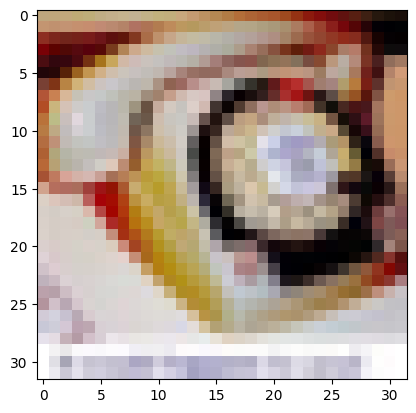

86
telephone
5
household_electrical_devices


In [ ]:
num = 5

img = x_train[num]
plt.imshow(img)
plt.show()
print(y_train_union[num][0])
print(labels_fine[y_train_union[num][0]])
print(y_train_union[num][1])
print(labels_coarse[y_train_union[num][1]])

In [ ]:
x_train_own, x_val_own, y_train_own, y_val_own = train_test_split(x_train, y_train_union, test_size=0.2, stratify=y_train_union)

In [ ]:
# prompt: I want to check correct stratification of data (stratification means same proportion of classes in train and validation data)

print(f'Shape of x_train_own: {x_train_own.shape}')
print(f'Shape of x_val_own: {x_val_own.shape}')
print(f'Shape of y_train_own: {y_train_own.shape}')
print(f'Shape of y_val_own: {y_val_own.shape}')

# Check class proportions in the original training data
unique_classes, class_counts = np.unique(y_train_union, axis=0, return_counts=True)
total_samples = len(y_train_union)
original_proportions = class_counts / total_samples

# Check class proportions in the training split
unique_train_classes, train_class_counts = np.unique(y_train_own, axis=0, return_counts=True)
train_total_samples = len(y_train_own)
train_proportions = train_class_counts / train_total_samples


# Check class proportions in the validation split
unique_val_classes, val_class_counts = np.unique(y_val_own, axis=0, return_counts=True)
val_total_samples = len(y_val_own)
val_proportions = val_class_counts / val_total_samples

print("Original Proportions:")
for i in range(len(unique_classes)):
    print(f"Class {unique_classes[i]}: {original_proportions[i]}")

print("\nTrain Proportions:")
for i in range(len(unique_train_classes)):
  print(f"Class {unique_train_classes[i]}: {train_proportions[i]}")


print("\nValidation Proportions:")
for i in range(len(unique_val_classes)):
  print(f"Class {unique_val_classes[i]}: {val_proportions[i]}")

Shape of x_train_own: (40000, 32, 32, 3)
Shape of x_val_own: (10000, 32, 32, 3)
Shape of y_train_own: (40000, 2)
Shape of y_val_own: (10000, 2)
Original Proportions:
Class [0 4]: 0.01
Class [1 1]: 0.01
Class [ 2 14]: 0.01
Class [3 8]: 0.01
Class [4 0]: 0.01
Class [5 6]: 0.01
Class [6 7]: 0.01
Class [7 7]: 0.01
Class [ 8 18]: 0.01
Class [9 3]: 0.01
Class [10  3]: 0.01
Class [11 14]: 0.01
Class [12  9]: 0.01
Class [13 18]: 0.01
Class [14  7]: 0.01
Class [15 11]: 0.01
Class [16  3]: 0.01
Class [17  9]: 0.01
Class [18  7]: 0.01
Class [19 11]: 0.01
Class [20  6]: 0.01
Class [21 11]: 0.01
Class [22  5]: 0.01
Class [23 10]: 0.01
Class [24  7]: 0.01
Class [25  6]: 0.01
Class [26 13]: 0.01
Class [27 15]: 0.01
Class [28  3]: 0.01
Class [29 15]: 0.01
Class [30  0]: 0.01
Class [31 11]: 0.01
Class [32  1]: 0.01
Class [33 10]: 0.01
Class [34 12]: 0.01
Class [35 14]: 0.01
Class [36 16]: 0.01
Class [37  9]: 0.01
Class [38 11]: 0.01
Class [39  5]: 0.01
Class [40  5]: 0.01
Class [41 19]: 0.01
Class [42 

In [ ]:
print(f'Dimensiones de x_train_own: {x_train_own.shape}')
print(f'Dimensiones de y_train_own: {y_train_own.shape}')

Dimensiones de x_train_own: (40000, 32, 32, 3)
Dimensiones de y_train_own: (40000, 2)


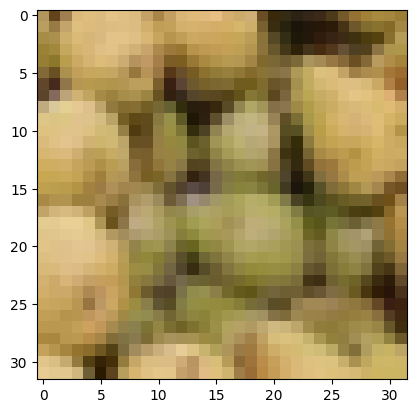

57
pear
4
fruit_and_vegetables


In [ ]:
num2 = 5

img_selected = x_train_own[num2]
plt.imshow(img_selected)
plt.show()

print(y_train_own[num2][0])
print(labels_fine[y_train_own[num2][0]])
print(y_train_own[num2][1])
print(labels_coarse[y_train_own[num2][1]])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Number of fine-grain (100) and coarse-grain (20) classes
fine_classes = 100
coarse_classes = 20

# Define the input layer
input_layer = layers.Input(shape=(32, 32, 3), name="matrix_input")  # CIFAR-100 images
flatten_layer = layers.Flatten(name="flattened_input")(input_layer)
# Hidden layers
dense_512 = layers.Dense(512, activation='relu', name="dense_512")(flatten_layer)
dense_256 = layers.Dense(256, activation='relu', name="dense_256")(dense_512)

# Fine-grain prediction branch (100 classes)
fine_output = layers.Dense(fine_classes,
                           activation='softmax',
                           name='fine_output')(dense_256)

# Coarse-grain prediction branch (20 classes)
coarse_output = layers.Dense(coarse_classes,
                             activation='softmax',
                             name='coarse_output')(dense_256)

# Define the model with two outputs
model = models.Model(inputs=input_layer, outputs=[fine_output, coarse_output])

# Compile the model with separate loss functions for each output
model.compile(
    optimizer='adam',
    loss={'fine_output': 'sparse_categorical_crossentropy', 'coarse_output': 'sparse_categorical_crossentropy'},
    metrics={'fine_output': 'accuracy', 'coarse_output': 'accuracy'}
)

# Print model summary
model.summary()


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ matrix_input (InputLayer) │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flattened_input (Flatten) │ (None, 3072)           │              0 │ matrix_input[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_512 (Dense)         │ (None, 512)            │      1,573,376 │ flattened_input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_256 (Dense)         │ (None, 256)            │        131,328 │ dense_512[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fine_output (Dense)       │ (None, 100)            │         25,700 │ dense_256[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ coarse_output (Dense)     │ (None, 20)             │          5,140 │ dense_256[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,735,544 (6.62 MB)

 Trainable params: 1,735,544 (6.62 MB)

 Non-trainable params: 0 (0.00 B)

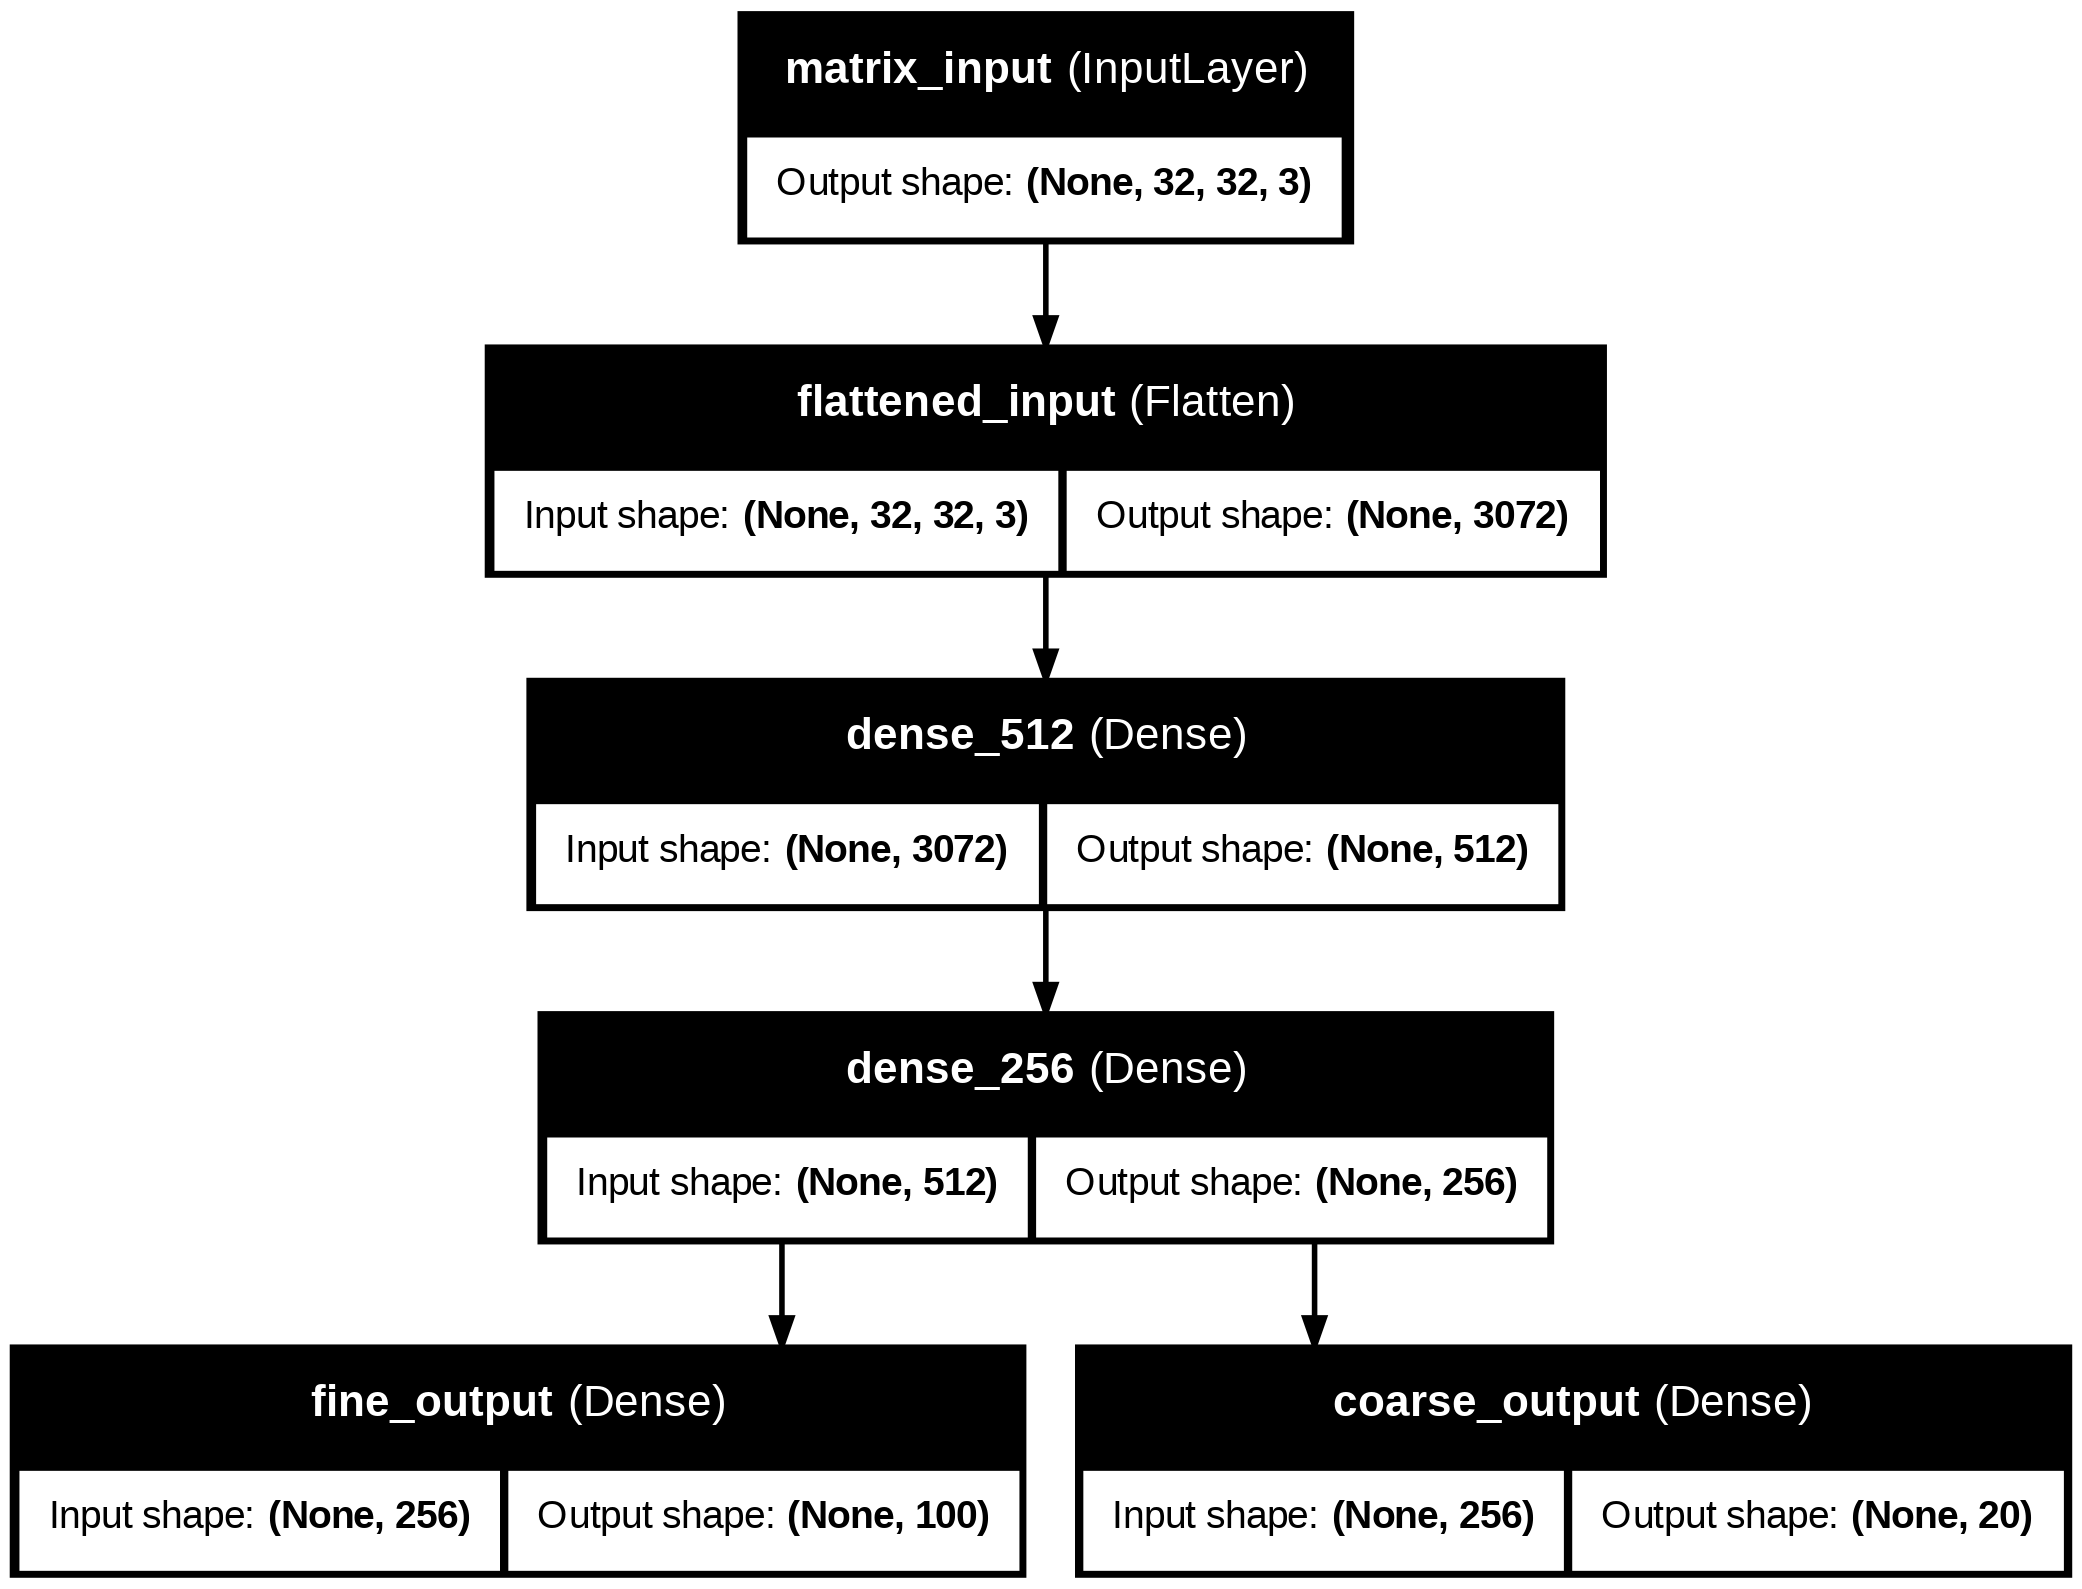

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(x_train_own.shape)
print(y_train_own.shape)

lista = y_train_own[:,0]
print(lista)

(40000, 32, 32, 3)
(40000, 2)
[ 2 70 79 ... 54  7 88]


In [ ]:
#x_train_own, x_val_own, y_train_own, y_val_own = train_test_split(x_train, y_train_union, test_size=0.2, stratify=y_train_union)

history = model.fit(
    x = x_train_own,
    y = {'fine_output': lista, 'coarse_output': y_train_own[:,1]},
    epochs = 100,
    batch_size = 32,
    validation_data = (x_val_own, {'fine_output': y_val_own[:,0], 'coarse_output': y_val_own[:,1]}),
    # Add the following line:
    callbacks=[tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: print(logs))]
)

Epoch 1/100


AttributeError: 'NoneType' object has no attribute 'items'